<a href="https://colab.research.google.com/github/uditnarayanpandey/Attribution-Methodology/blob/Master/Forecasting/Air_Passengers/Time_Series_(Air_Passengers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Passengers (Forecasting)**

**1. What is Time series analysis?**

> A. Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

**2. Why & where Time Series is used?**
> A. Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:
* Business Forecasting
* Understand past behavior
* Plan the future
* Evaluate current accomplishment 




## **Importing Libraries** 📚

In [53]:
# Library to import files from local to colab directory
from google.colab import files

# Libraries to handle dataframe
import numpy as np
import pandas as pd

# Importing Visualisation Libraries
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 5]

## **Uploading CSV data from local**

In [26]:
# Calling upload function to get the CSV data from the local to colab directory
files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

## **DataFrame creation** 

In [29]:
# Reading data and putting it into a dataframe
dataframe = pd.read_csv('AirPassengers.csv')
dataframe.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## **Updating name of the columns**


---


1.   **Month -> Date**
2.   **#Passengers -> Passengers**





In [34]:
dataframe.columns = ['Date', 'Passengers']
dataframe.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [51]:
# Checking NULs in the data
dataframe.isnull().sum()

Date          0
Passengers    0
dtype: int64

In [52]:
# To check if we have any duplicate values present in the dataframe 
dataframe[dataframe.duplicated()]

,Date,Passengers


## **Checking outliers and Treating them**

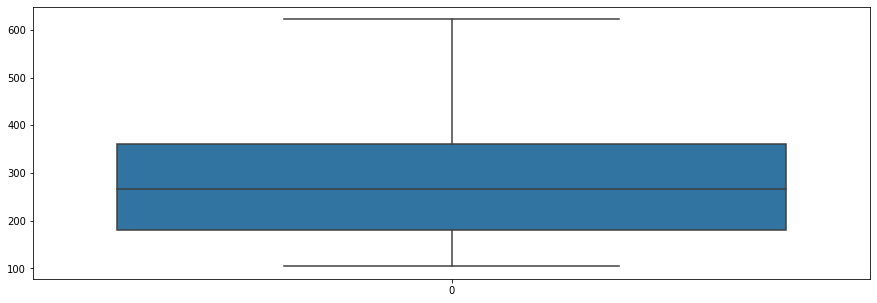

In [54]:
sns.boxplot(data= dataframe['Passengers'])

> There's no outliers present in the dataset

## **Checking the distribution of the target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


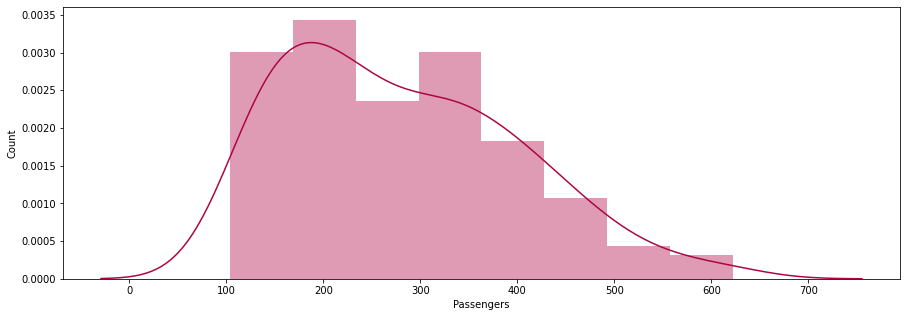

In [55]:
# Visualizing th edistribution of volume 
sns.distplot(dataframe['Passengers'], kde = True, color ='#ad0543')
plt.ylabel('Count')
plt.show()

In [57]:
print("Minimum value in the dataframe is: {}\n\
Maximum value in the dataframe is: {}\n\
Median of the dataframe is: {}"\
.format(dataframe['Passengers'].min(), dataframe['Passengers'].max(), dataframe['Passengers'].median()))

Minimum value in the dataframe is: 104
Maximum value in the dataframe is: 622
Median of the dataframe is: 265.5


> Because the dataframe's Date column is an object datatype, we must convert it to a datetime datatype because the Forecasting algorithm expects the date to be in datetime datatype.




In [47]:
# Getiing the range of the data
print(f'Data starts from the year {dataframe["Date"].min()}\n\
Data ends in the year {dataframe["Date"].max()}')

Data starts from the year 1949-01
Data ends in the year 1960-12


## **Updating DataTypes of the columns**

In [48]:
#Changing Date column to date_time 
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [50]:
dataframe.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## **Making date column as index of the table**

In [58]:
dataframe.set_index('Date', inplace = True)

## **Time Resampling**